In [1]:
# Imports

import logging.config
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)
    
from estimize.use_cases import PreEarningsPricingEventStudy

import matplotlib.pyplot as plt


# Configure logging

logging.config.dictConfig({
    'version': 1,
    'disable_existing_loggers': False,
    'formatters': {
        'standard': {
            'format': '%(asctime)s [%(levelname)s] %(name)s: %(message)s'
        },
    },
    'handlers': {
        'default': {
            'level':'INFO',
            'class':'logging.StreamHandler',
            'stream'  : 'ext://sys.stdout',
            'formatter' : 'standard'
        },
    },
    'loggers': {
        '': {
            'handlers': ['default'],
            'level': 'INFO',
            'propagate': True
        }
    }
})

In [2]:
def plot_results(df):
    """
    Plots cumulative residual returns based on decile.
    
    Parameters
    ----------
    results : pd.DataFrame
    """
    df = df.reset_index()
    df.set_index('event_time', inplace=True)
    
    colors = ['black', 'blue', 'aqua', 'green', 'lime', 'yellow', 'orange', 'coral', 'pink', 'red']
    
    plt.figure(figsize=(16, 10))
    
    deciles = list(df['decile'].unique())
    deciles.reverse()
    
    for decile in deciles:
        color = colors[decile - 1]
        ddf = df.loc[df['decile'] == decile, 'cumulative_residual_return']
        ddf -= ddf.iloc[0]
        ddf *= 100.0
        ddf.plot(label=decile)
    
    plt.ylabel("% Cumulative Residual Return")
    plt.xlabel("Event Time")
    plt.gca().grid(True)
    plt.legend(title='Quintile', loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

In [3]:
# Run event study

start_date = '2012-01-01'
end_date = '2017-10-01'

es = PreEarningsPricingEventStudy(
    start_date=start_date,
    end_date=end_date,
    days_before=10,
    days_after=5
)

df = es.results

2017-12-07 20:07:31,743 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: start
2017-12-07 20:07:32,218 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: end
2017-12-07 20:07:34,492 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: start
2017-12-07 20:07:34,541 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: end
2017-12-07 20:07:34,625 [INFO] estimize.services.residual_returns_service: market_neutral_residual_returns: start
2017-12-07 20:07:35,498 [INFO] estimize.services.residual_returns_service: market_neutral_residual_returns: end


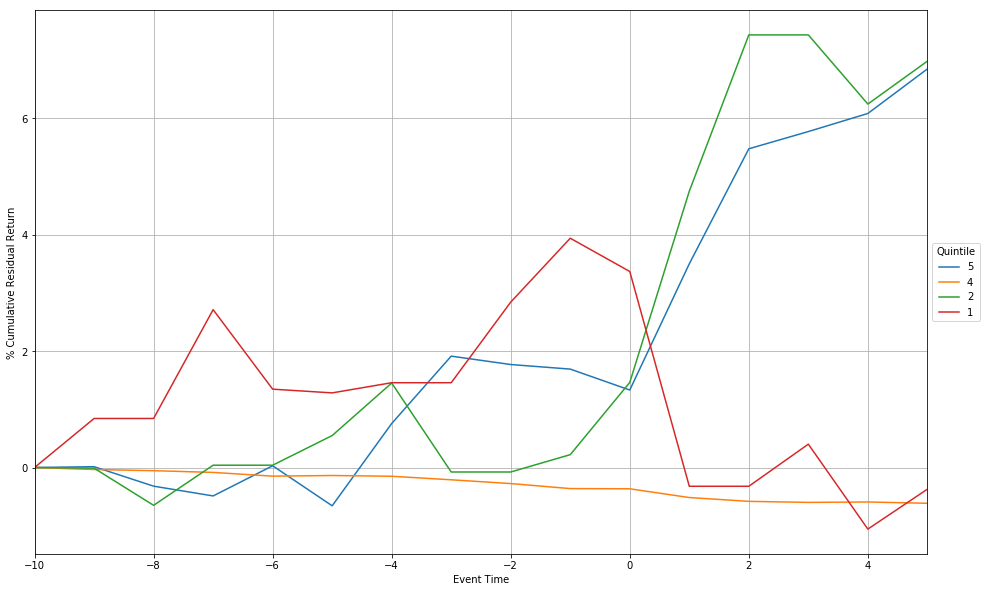

In [4]:
plot_results(df)